In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



In [3]:
# Descargar el archivo

url = "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"

data = pd.read_csv(url, sep=';')


print(data.shape)
print(data.head)

(41188, 21)
<bound method NDFrame.head of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         

Descripcíon del problemas

Quieren poder identificar a los clientes existentes que tienen:
 - Una mayor probabilidad de contratar un depósito a largo plazo.

Para abordar este problema crearemos un algoritmo de clasificación que ayude a predecir si un cliente contrará o no un depósito a largo plazo.

Analisis exploratorio 

Herramientas estadísticas y de visualización 
Llevaremos a cabo estas fases:

- Análisis de cada variable de manera individual
- Análisis univariado: relación de cada variable predictora con la variable a predecir
- Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

La idea crear un mapa mental del set de datos (entenderlo)
Empezar a encontrar respuestas a la pregunta planteada inicialmente

In [4]:
# Analizamos cada variable de manera individual 
# Podemos ver cuales son categóricas 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [6]:
# Vemos si hay valores nulos en el dataframe
valores_nulos = data.isnull().sum()
print("Valores nulos en el dataframe")
print()
print(valores_nulos)

Valores nulos en el dataframe

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [7]:
# Vamos a eleminar aquellas columnas que, no, nos interesa

# Mostrar las columnas actuales
print("Columnas antes de eliminar:")
print(data.columns)

# Lista de columnas que se intentarán eliminar
columnas_a_eliminar = ['nr.employed', 'euribor3m', 'cons.conf.idx', 'cons.price.idx', 'emp.var.rate', 'day_of_week','duration', 'campaign', 'pdays', 'previous' ]

# Verificar si las columnas que se intentarán eliminar existen en el DataFrame
columnas_existentes = [col for col in columnas_a_eliminar if col in data.columns]

# Eliminar las columnas existentes
if columnas_existentes:
    data = data.drop(columns=columnas_existentes)
    print("\nColumnas eliminadas exitosamente:", columnas_existentes)
else:
    print("\nNo se encontraron las columnas a eliminar en el DataFrame.")

# Mostrar las columnas después de eliminar
print("\nColumnas después de eliminar:")
print(data.columns)

Columnas antes de eliminar:
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

Columnas eliminadas exitosamente: ['nr.employed', 'euribor3m', 'cons.conf.idx', 'cons.price.idx', 'emp.var.rate', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']

Columnas después de eliminar:
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome', 'y'],
      dtype='object')


Con las variables categoricas generamos graficos de baras 

C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_8996\2280768111.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_8996\2280768111.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_8996\2280768111.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)
C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_8996\2280768111.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a

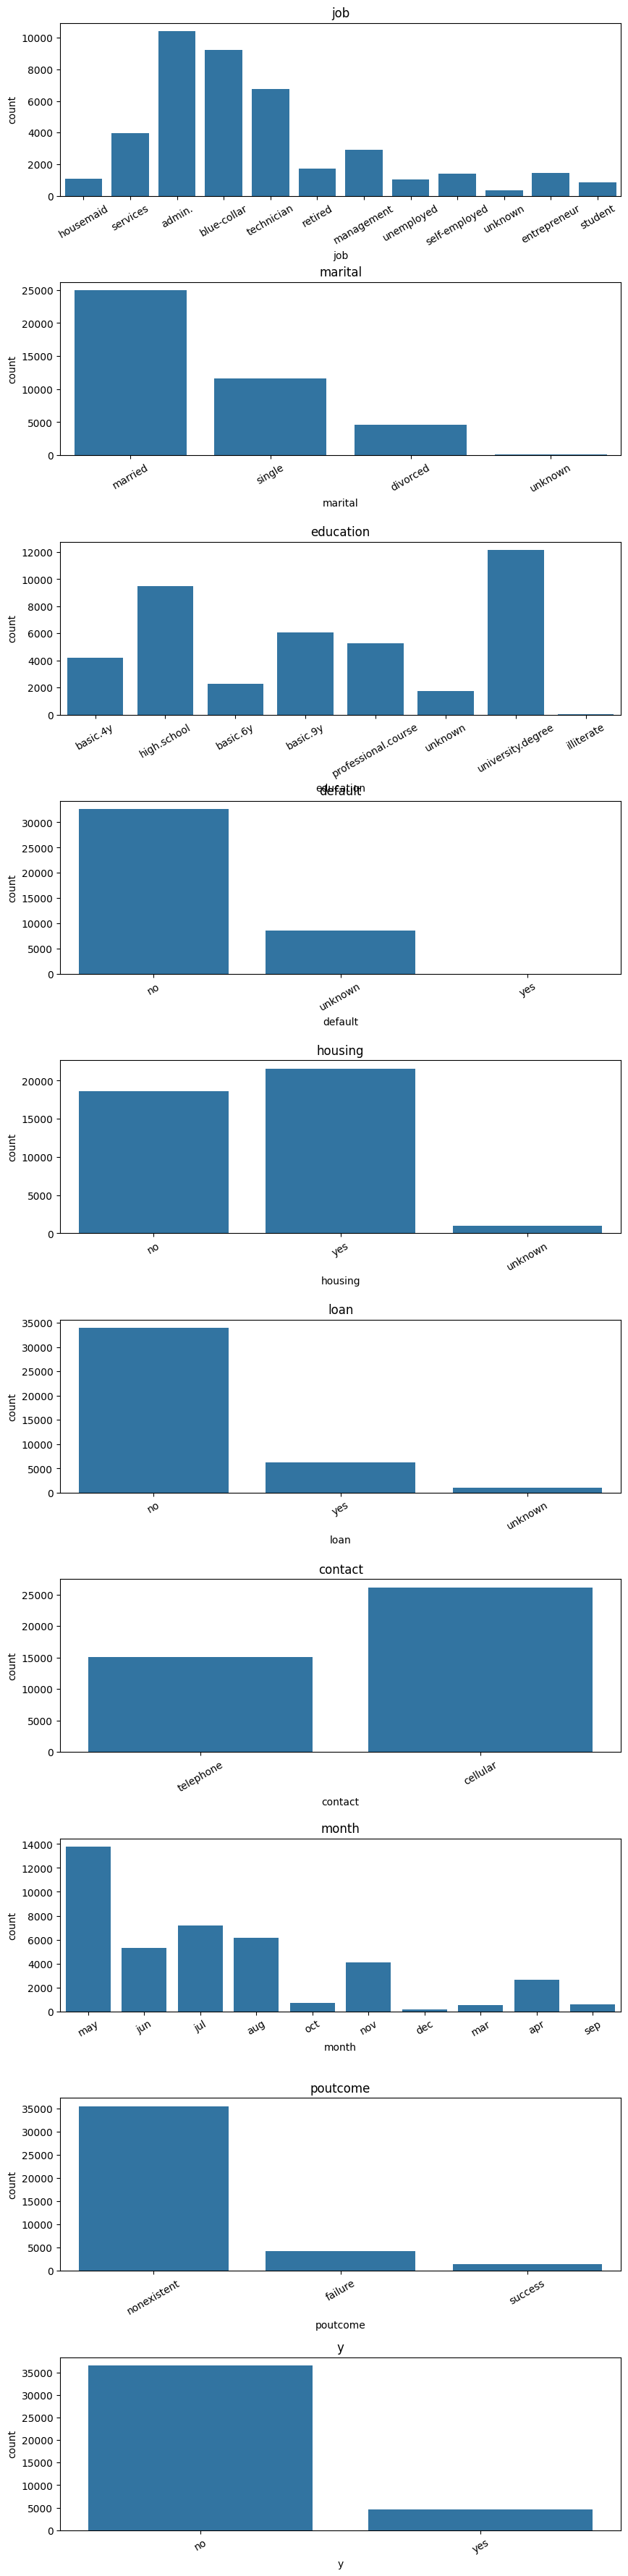

In [8]:
# Seleccionamos las variables categoricas 
variables_cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(variables_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(variables_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)


Analisis de variables númericas (Edad)


In [9]:
data.describe()

,age
count,41188.00000
mean,40.02406
std,10.42125
min,17.00000
25%,32.00000
50%,38.00000
75%,47.00000
max,98.00000


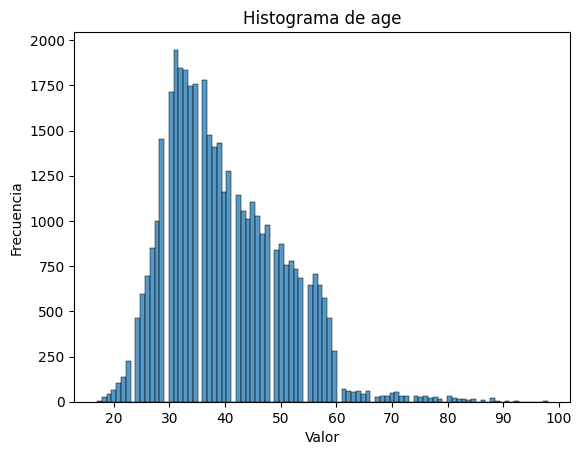

In [10]:
# Histograma de age 

sns.histplot(data['age'])

plt.title('Histograma de age')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

El análisis univariado es una técnica estadística en la que se examina una única variable a la vez. El objetivo principal es comprender la distribución y las características de esa variable individualmente.

Teniendo claras algunas características generales de cada dato individual, la idea ahora es analizar si existe alguna relación entre las posibles variables predictoras (age, loan, etc...)
y nuestra variable a predecir que es Y

Y = El cliente contrata un depósito a largo plazo o no?????????

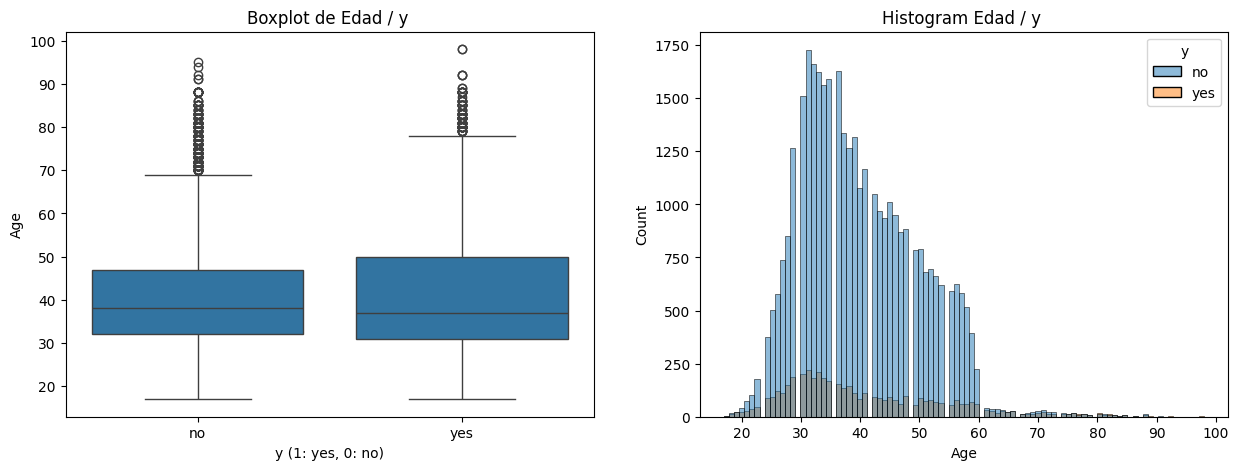

In [11]:
# Analizar entre la variable numérica (Edad) y la variable a predecir (y)

# Crear la figura y los ejes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=.25)

# Graficar boxplots
sns.boxplot(x="y", y="age", data=data, ax=ax[0])
ax[0].set_xlabel('y (1: yes, 0: no)')
ax[0].set_ylabel('Age')
ax[0].set_title("Boxplot de Edad / y ")

# Histograma de edades
sns.histplot(data=data, x="age", hue="y", ax=ax[1])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Count')
ax[1].set_title("Histogram Edad / y ")

# Mostrar la gráfica
plt.show()

IMPLEMENTACIÓN DEL MODELO DE REGRESIÓN LOGISTICA

- Codificamos las variables categoricas (One-Hot)
- Separamos las variables para entrenar el modelo
- Escalamos los datos con estaderización
- Dividimos en conjunto de entrenamiento y prueba
- Calculamos, print de la precisión del modelo 
- Generamos Matriz de confusión con Seaborn

In [15]:
# Codificación one-hot para las variables categóricas
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
encoder = OneHotEncoder(drop='first')  # drop='first' para evitar la colinealidad
encoded_cols = pd.DataFrame(encoder.fit_transform(data[categorical_cols]).toarray())
encoded_cols.columns = encoder.get_feature_names_out(categorical_cols)

# Concatenar las variables codificadas con las variables numéricas
data_encoded = pd.concat([data.drop(categorical_cols, axis=1), encoded_cols], axis=1)

# Separar variables independientes (X) y variable dependiente (y)
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Escalar las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos escalados en conjunto de entrenamiento y conjunto de prueba
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Inicializar y ajustar el modelo de regresión logística con los datos escalados
model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba con los datos escalados
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Calcular la precisión del modelo con datos escalados
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Precisión del modelo de regresión logística con datos escalados:", accuracy_scaled)

Precisión del modelo de regresión logística con datos escalados: 0.8953629521728574


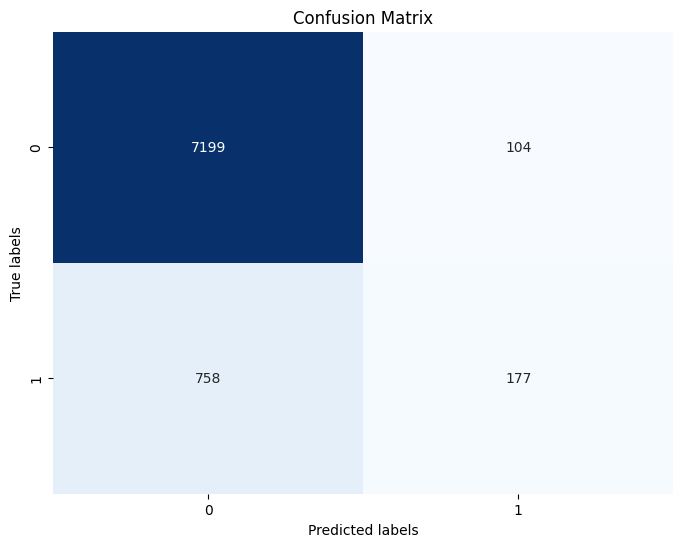

In [16]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_scaled)

# Visualizar la matriz de confusión con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()